In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy.matlib
import random
from skimage import io
import scipy.misc
import imageio

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def random_cluster_centers(img_data, K):
    centroid = random.sample(list(img_data), K)
    return centroid

In [7]:
def closest_cluster_centers(img_data, centroid):
    K = np.size(centroid,0)
    idx = np.zeros((np.size(img_data,0),1))
    arr = np.empty((np.size(img_data,0),1))
    for i in range(0,K):
        y = centroid[i]
        temp = np.ones((np.size(img_data,0),1))*y
        b = np.power(np.subtract(img_data,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(img_data,0),1))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [8]:
def calculate_cluter_center(img_data,idx,K):
    n = np.size(img_data,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(img_data,0),1))
        total_matrix = numpy.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(img_data,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [9]:
def KMean_cluster(img_data,random_centers,max_iters):
    m = np.size(img_data,0)
    n = np.size(img_data,1)
    K = np.size(random_centers,0)
    centroids = random_centers
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_cluster_centers(img_data,centroids)
        centroids = calculate_cluter_center(img_data,idx,K)
    return centroids,idx

In [23]:
def data(path, n_init, target_path, name):
  img = io.imread(path)
  img_data = (img/255).reshape(img.shape[0]*img.shape[1],3)
  io.imshow(img)
  io.show()
  K = [2, 5, 10, 15, 20] #number of clusters
  max_iters = 20 #number of times the k-mean should run
  avg_comp_ri = []
  var_comp_ri = []
  comp_dict = {}

  for i in K:
      comp_ri = []
      print("With K value =", i)


      for temp in range(2, n_init+2, 2):
          random_centers = random_cluster_centers(img_data,i)
          #print(1)
          centroids,idx = KMean_cluster(img_data,random_centers,max_iters)
          
          idx = closest_cluster_centers(img_data,centroids)
          img_data_recovered = centroids[idx]
          img_data_recovered = np.reshape(img_data_recovered, (img.shape[0], img.shape[1], 3))

          plt.imshow(img_data_recovered)
          plt.show()
          
          img_comp = target_path+'compressed_'+name+'_'+str(i)+'.jpg'
          plt.imsave(img_comp, img_data_recovered)
          
          original_image = os.stat(path)
          new_image = os.stat(img_comp)
          
          comp_ri.append(original_image.st_size / float(new_image.st_size))
          
      comp_dict[i] = comp_ri
      avg_comp_ri.append(np.mean(comp_ri))
      var_comp_ri.append(np.var(comp_ri))

  #print(comp_dict, avg_comp_ri, var_comp_ri)
  return comp_dict, avg_comp_ri, var_comp_ri

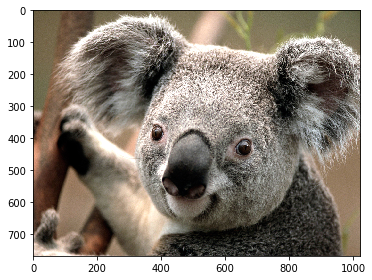

With K value = 2


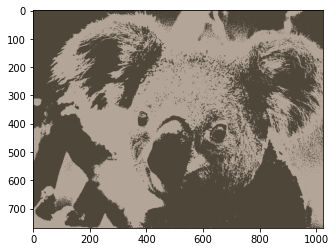

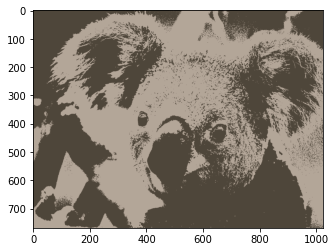

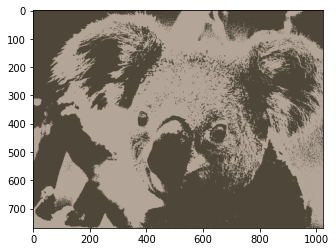

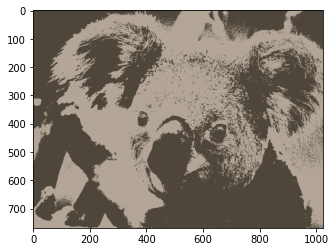

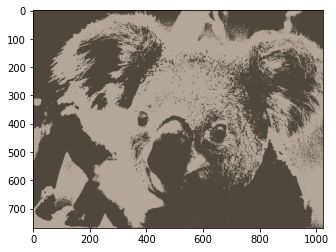

With K value = 5


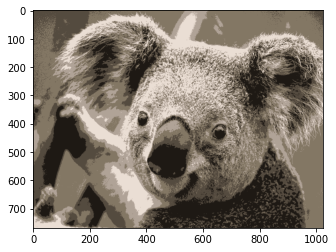

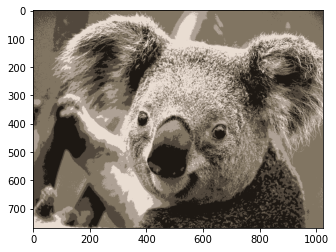

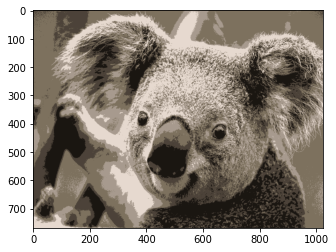

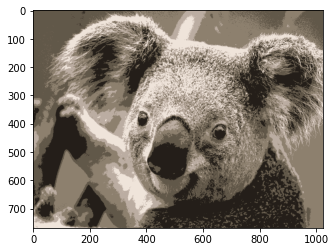

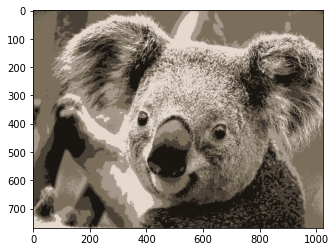

With K value = 10


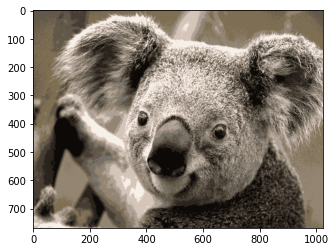

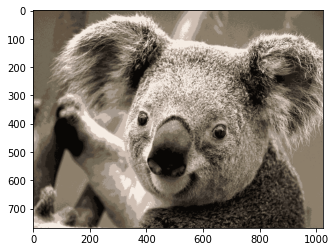

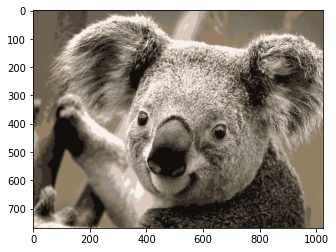

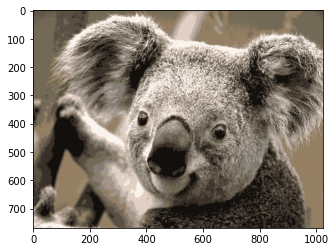

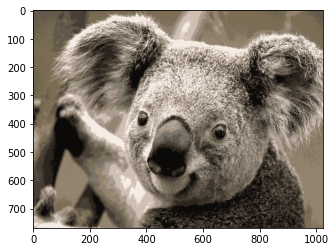

With K value = 15


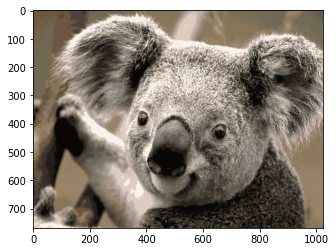

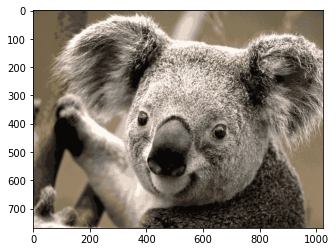

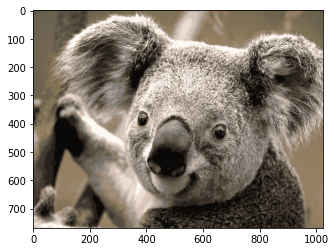

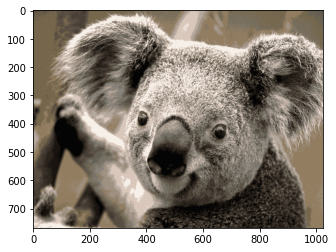

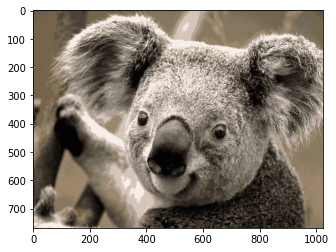

With K value = 20


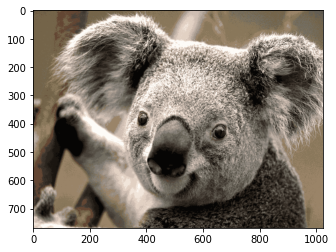

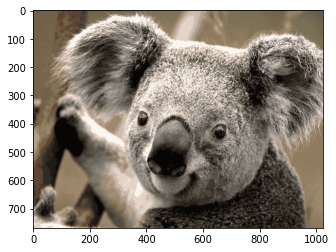

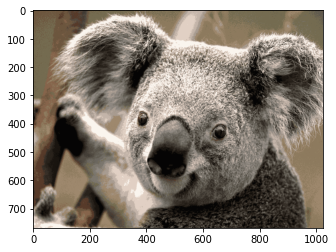

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


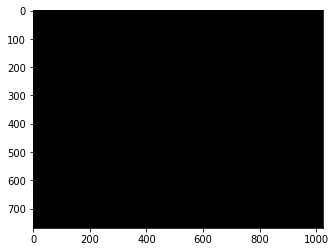

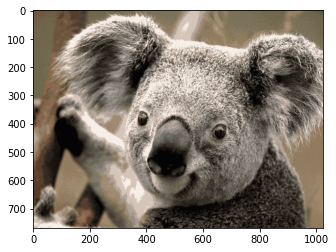

compression ratios: {2: [5.904739938595562, 5.9034453038172785, 5.907777861844594, 5.904695286564478, 5.877936781565932], 5: [4.387997549832253, 4.417389385787749, 4.444798005385005, 4.475394332614975, 4.437598745155094], 10: [4.62114944161355, 4.7525867945659055, 4.793373767633734, 4.752239696180344, 4.6798381780041955], 15: [4.900623223061136, 4.915740699936415, 4.8752879914585945, 4.971102792314451, 4.8491290172333485], 20: [5.060145162335559, 4.998854047963534, 4.945599300752451, 60.45923344947735, 4.899608448477091]}
Average compression ratios: [5.8997190344775685, 4.432635603755015, 4.719837575599546, 4.902376744800788, 16.072688081801196]
 compression ratios Variance: [0.00012065377732492825, 0.0008451737400005467, 0.0037738559795113882, 0.00169481215818783, 492.5442249345541]


In [24]:
path="/content/drive/MyDrive/Colab Notebooks/hw3_part2_data/Koala.jpg"
comp_dict, avg_comp_ri, var_comp_ri = data(path, 10, "/content/drive/MyDrive/Colab Notebooks/K_means_clustering", "koala")
print("compression ratios: {}\nAverage compression ratios: {}\n compression ratios Variance: {}".format(comp_dict, avg_comp_ri, var_comp_ri))

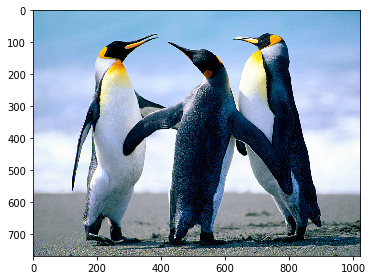

With K value = 2


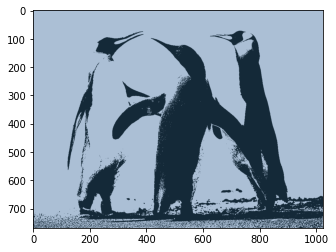

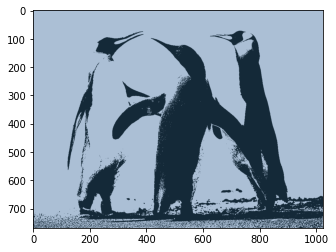

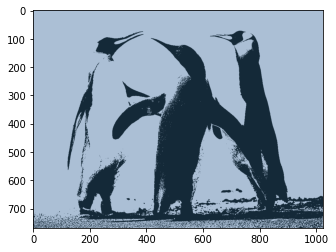

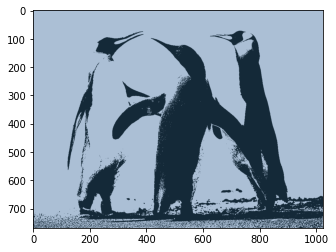

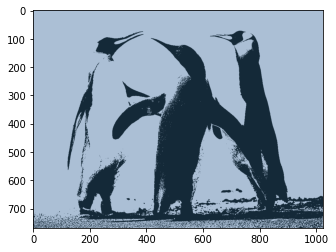

With K value = 5


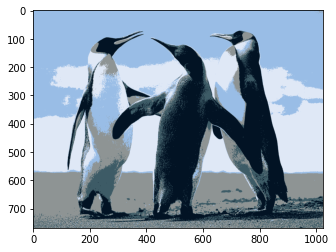

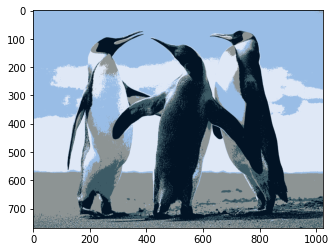

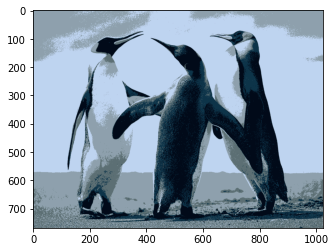

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


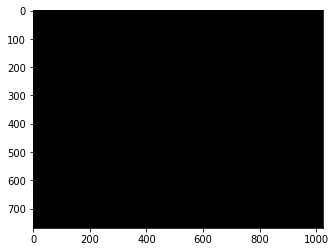

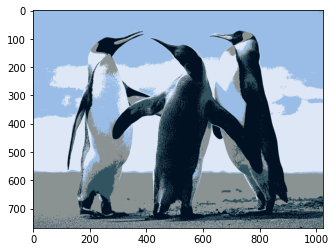

With K value = 10


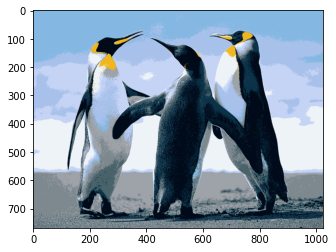

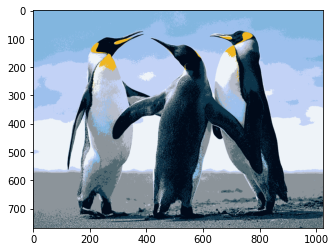

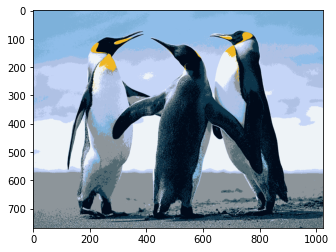

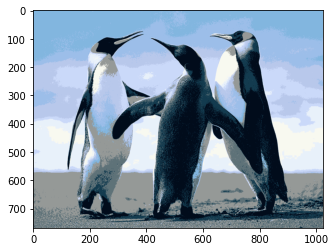

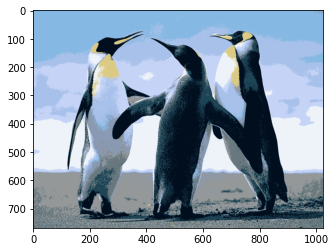

With K value = 15


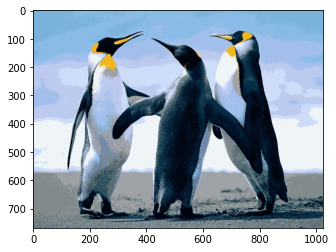

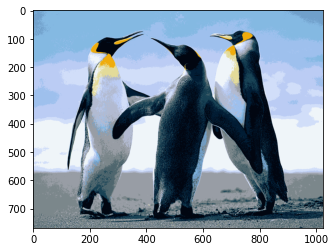

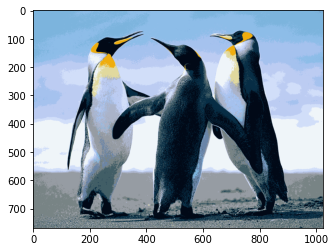

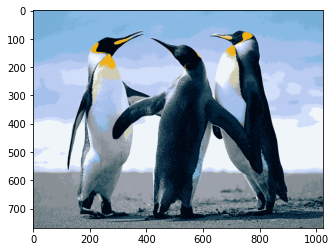

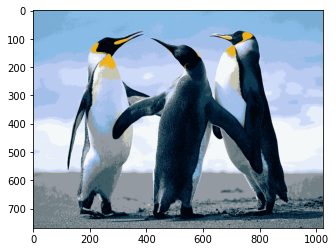

With K value = 20


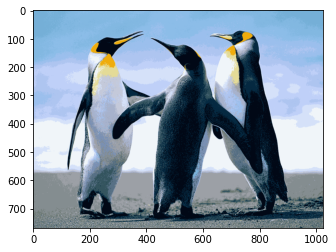

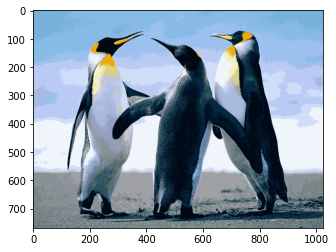

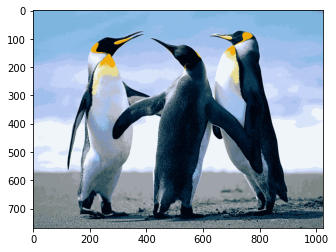

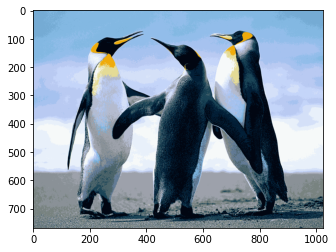

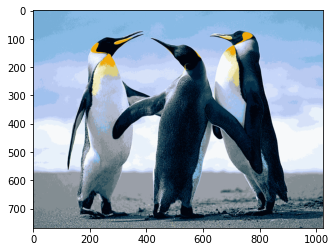

In [25]:
path="/content/drive/MyDrive/Colab Notebooks/hw3_part2_data/Penguins.jpg"
comp_dict, avg_comp_ri, var_comp_ri = data(path, 10, "/content/drive/MyDrive/Colab Notebooks/K_means_clustering", "Penguins")

In [26]:
print("compression ratios: {}\nAverage compression ratios: {}\n compression ratios Variance: {}".format(comp_dict, avg_comp_ri, var_comp_ri))

compression ratios: {2: [9.13166236205682, 9.13166236205682, 9.13166236205682, 9.13166236205682, 9.13166236205682], 5: [7.342776498130877, 7.345133996864908, 6.430142104871576, 60.22725512969416, 7.163704181248849], 10: [6.641917855008112, 6.611207438761113, 6.537527315515213, 6.577273995653681, 6.799375863214392], 15: [6.629859447849101, 6.623592826608989, 6.482066367772796, 6.633195183517533, 6.543191702347805], 20: [6.5791098555333765, 6.657380304353036, 6.620773892615165, 6.535330196605613, 6.649867487389929]}
Average compression ratios: [9.13166236205682, 17.70180238216207, 6.633460493630501, 6.582381105619246, 6.608492347299423]
 compression ratios Variance: [0.0, 452.217193558073, 0.008090946498969872, 0.0036267050796916916, 0.0020937604068506192]
